In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished


In [4]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [5]:
df.shape

(545, 12)

# 3. Visualization

### 1. Univariate

C:\Users\HP\AppData\Local\Temp\ipykernel_12524\1879734815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


Text(0.5, 1.0, 'Area distribution plot')

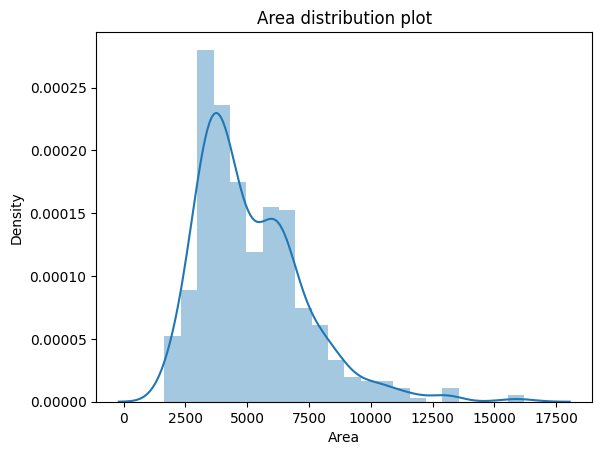

In [6]:
sns.distplot(df['area'])
plt.xlabel("Area")
plt.title("Area distribution plot")

In [7]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

Text(0.5, 1.0, 'Houses which have mainroads or not.')

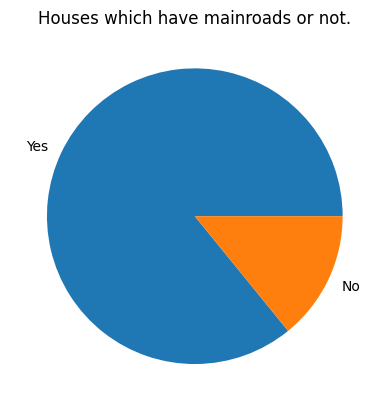

In [8]:
plt.pie(df['mainroad'].value_counts(),labels=["Yes","No"])
plt.title("Houses which have mainroads or not.")

Text(0.5, 1.0, 'Distribution of building stories')

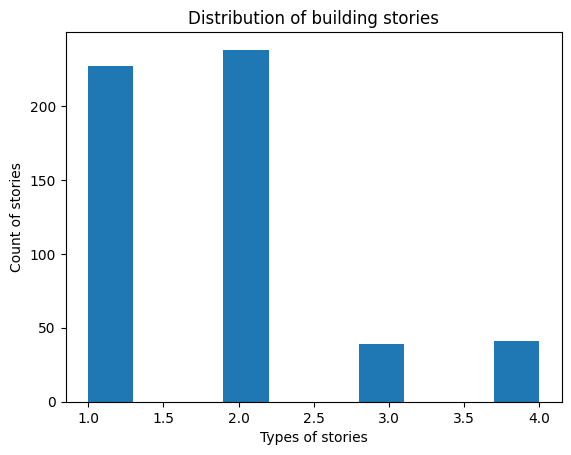

In [9]:
plt.hist(df['stories'])
plt.xlabel("Types of stories")
plt.ylabel("Count of stories")
plt.title("Distribution of building stories")

### 2. Bivariate

<Axes: xlabel='furnishingstatus', ylabel='area'>

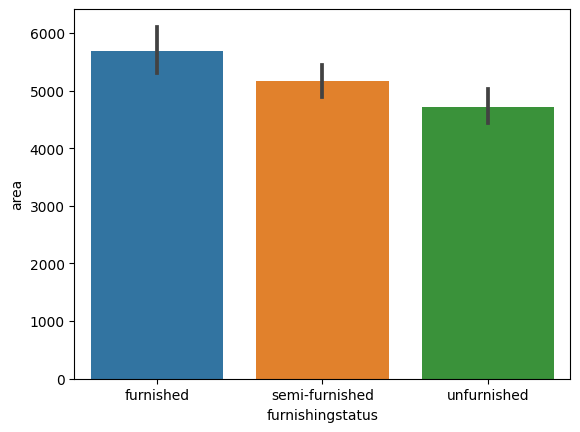

In [10]:
sns.barplot(data=df,x='furnishingstatus',y='area')

<Axes: xlabel='price', ylabel='area'>

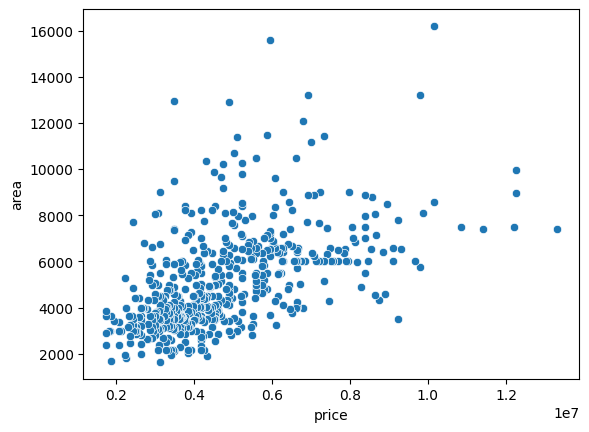

In [11]:
sns.scatterplot(data=df, x='price', y='area')

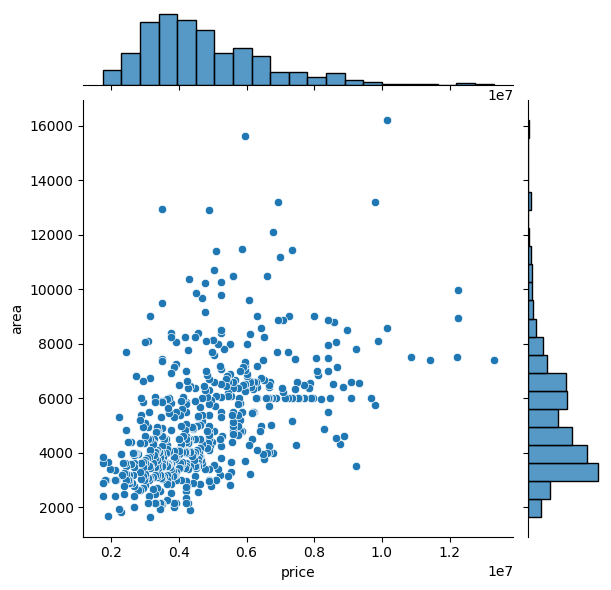

In [12]:
sns.jointplot(data=df,x='price',y='area')

### 3. Multivariate

In [13]:
df.select_dtypes(include='number').corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

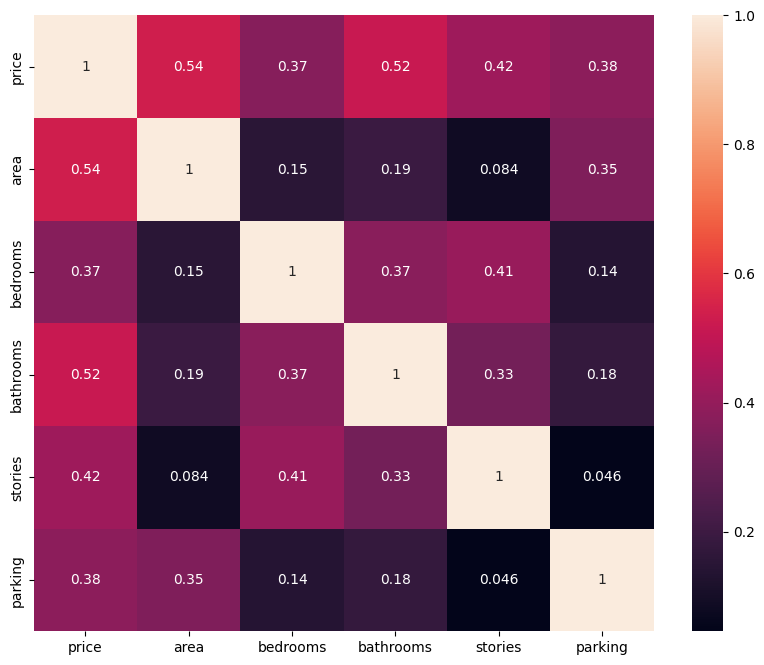

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

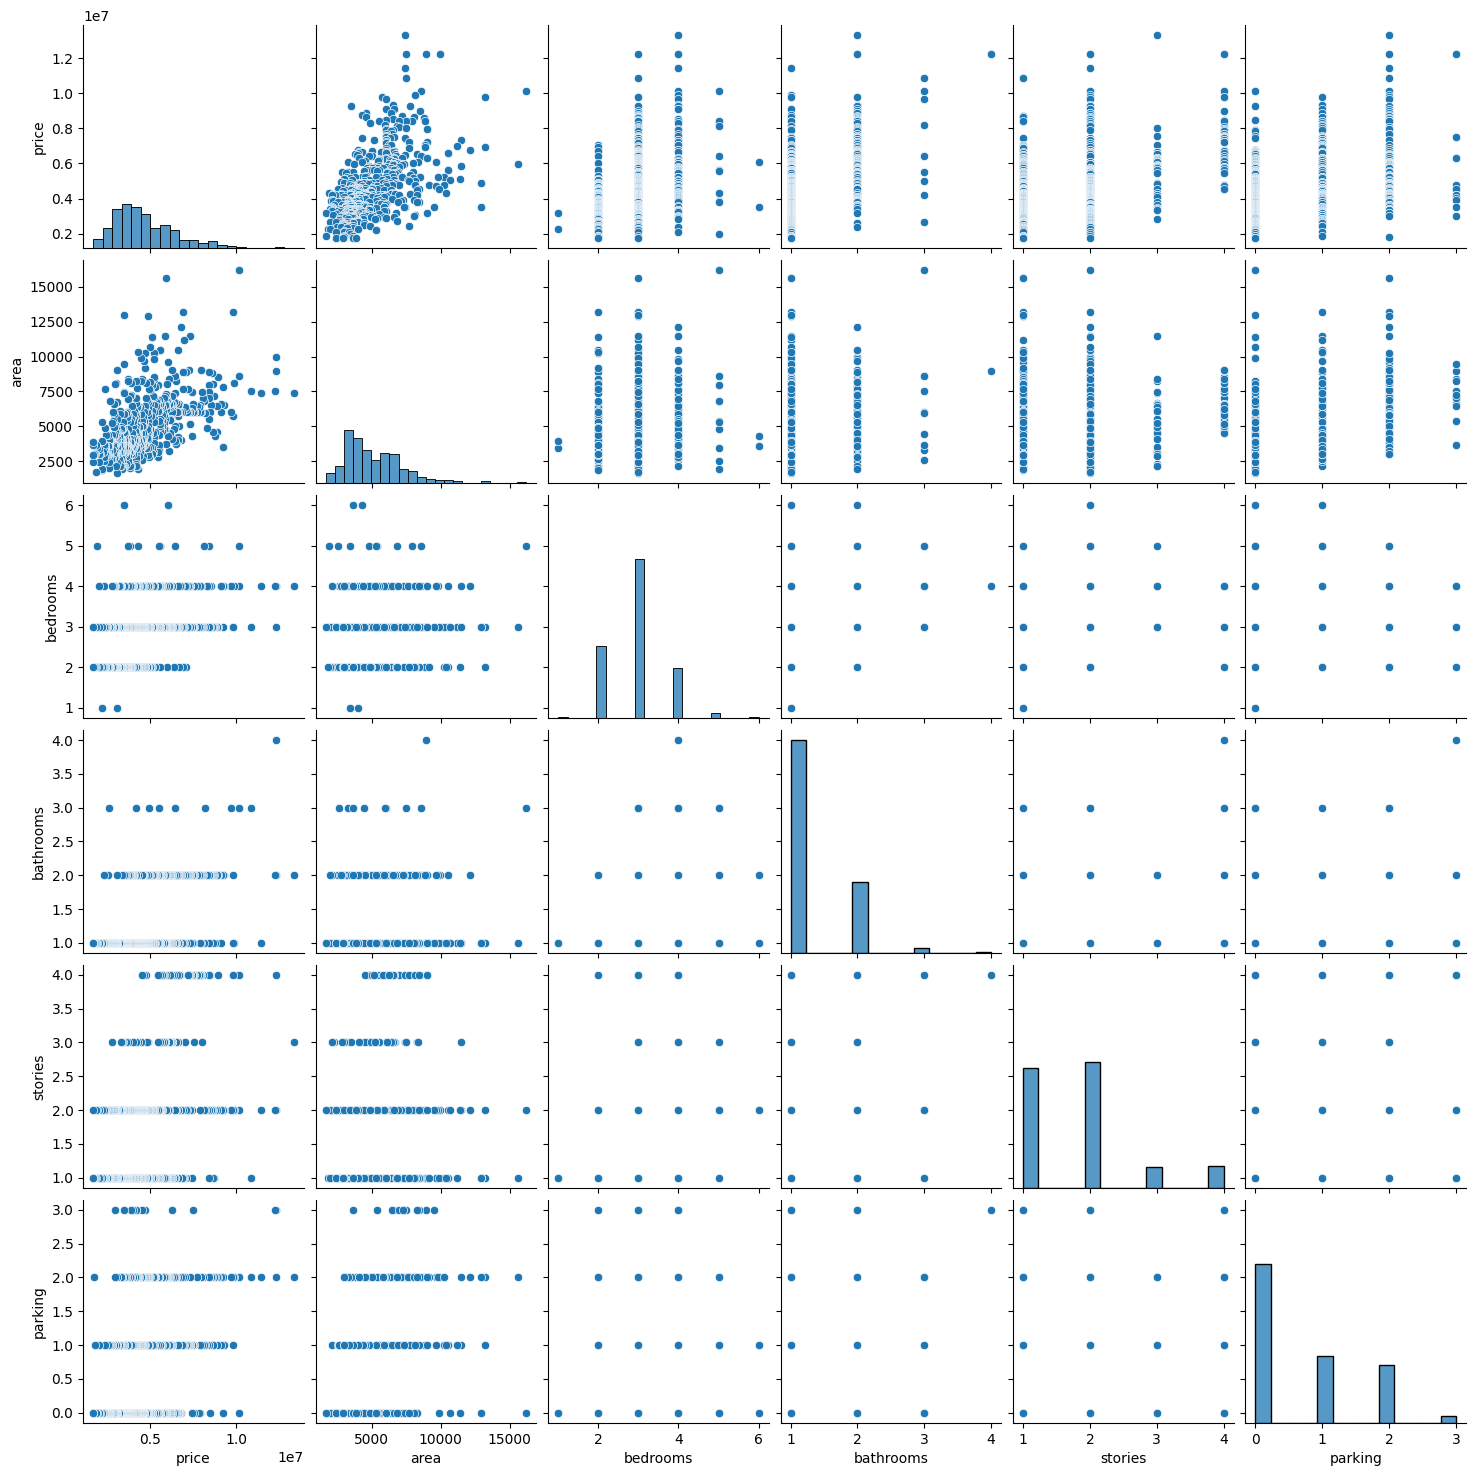

In [15]:
sns.pairplot(df)

# 4. Descriptive Analysis

In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df.select_dtypes(include='number').mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [18]:
df.select_dtypes(include='number').median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [19]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.select_dtypes(include='number').var()

price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [21]:
df.select_dtypes(include='number').std()

price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [22]:
df.select_dtypes(include="number").skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [23]:
df.select_dtypes(include='number').kurt()

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

In [24]:
df.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
furnishingstatus    unfurnished
dtype: object

In [25]:
df.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
furnishingstatus    furnished
dtype: object

In [26]:
quantile=df.select_dtypes(include='number').quantile(q=[0.75,0.25])
quantile

,price,area,bedrooms,bathrooms,stories,parking
0.75,5740000.0,6360.0,3.0,2.0,2.0,1.0
0.25,3430000.0,3600.0,2.0,1.0,1.0,0.0


In [27]:
IQR=quantile.iloc[0]-quantile.iloc[1]
IQR

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64

### UPPER EXTREME 

In [28]:
upper_extreme=quantile.iloc[0]+(1.5*IQR)
upper_extreme

price        9205000.0
area           10500.0
bedrooms           4.5
bathrooms          3.5
stories            3.5
parking            2.5
dtype: float64

### LOWER EXTREME

In [29]:
lower_extreme=quantile.iloc[1]-(1.5*IQR)
lower_extreme

price       -35000.0
area          -540.0
bedrooms         0.5
bathrooms       -0.5
stories         -0.5
parking         -1.5
dtype: float64

# 5. Checking for missing values

In [30]:
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

### There is no null value in the dataset


# 6. Find Outliers and replace them.

Text(0.5, 1.0, 'Boxplot of price')

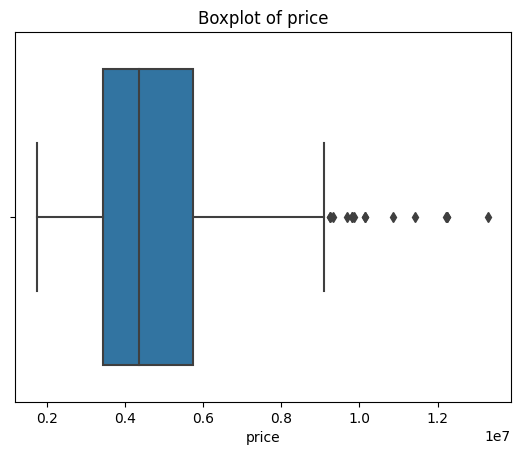

In [32]:
sns.boxplot(df,x='price')
plt.title("Boxplot of price")

In [33]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR = q3 - q1
le = q1 - (1.5 * IQR)
ue = q3 + (1.5 * IQR)
df['price']=np.where(df['price']>ue,ue,np.where(df['price']<le,le,df['price']))


<Axes: xlabel='price'>

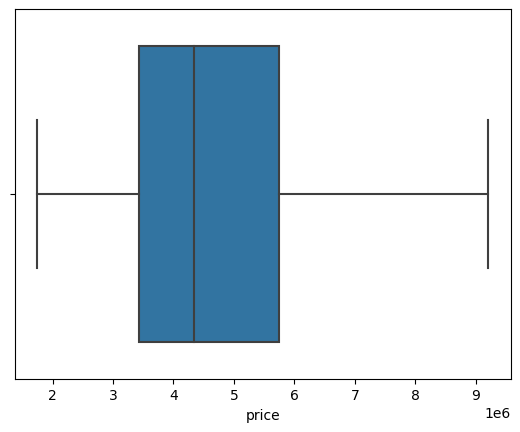

In [34]:
sns.boxplot(df,x='price')

<Axes: xlabel='area'>

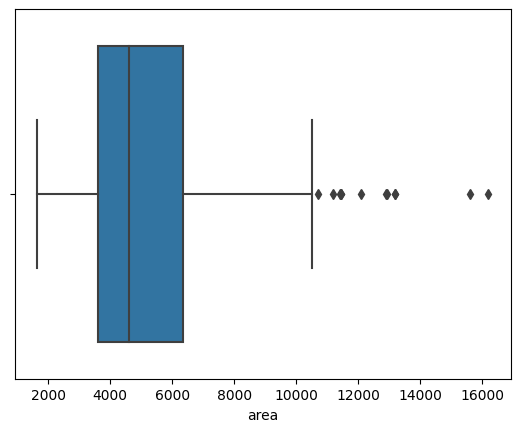

In [35]:
sns.boxplot(df,x='area')

In [36]:
q1=df['area'].quantile(0.25)
q3=df['area'].quantile(0.75)
IQR = q3 - q1
le = q1 - (1.5 * IQR)
ue = q3 + (1.5 * IQR)
df['area']=np.where(df['area']>ue,ue,np.where(df['area']<le,le,df['area']))


<Axes: xlabel='area'>

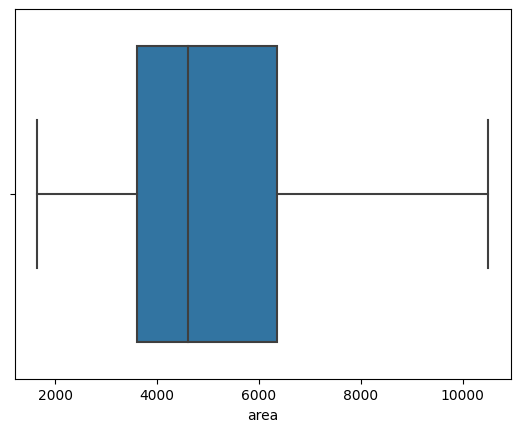

In [37]:
sns.boxplot(df,x='area')

<Axes: xlabel='bathrooms'>

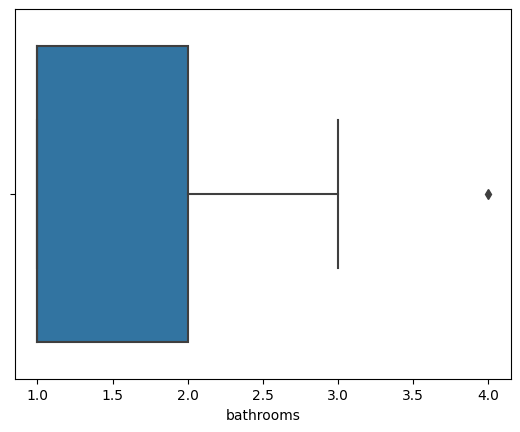

In [38]:
sns.boxplot(df,x='bathrooms')

In [39]:
q1=df['bathrooms'].quantile(0.25)
q3=df['bathrooms'].quantile(0.75)
IQR = q3 - q1
le = q1 - (1.5 * IQR)
ue = q3 + (1.5 * IQR)
df['bathrooms']=np.where(df['bathrooms']>ue,ue,np.where(df['bathrooms']<le,le,df['bathrooms']))


<Axes: xlabel='bathrooms'>

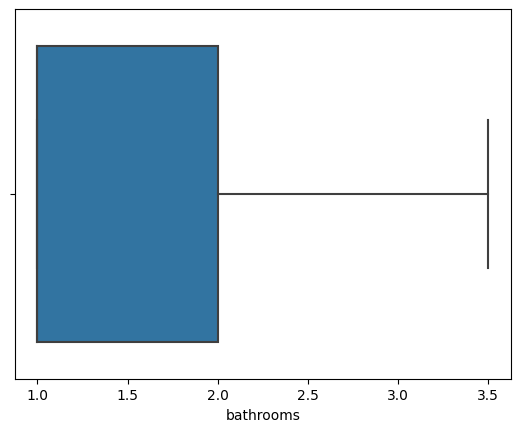

In [40]:
sns.boxplot(df,x='bathrooms')

# 7. Check for categorical columns and perform encoding

In [41]:
le = LabelEncoder()

In [42]:
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420.0,4,2.0,3,1,0,0,0,1,2,0
1,9205000.0,8960.0,4,3.5,4,1,0,0,0,1,3,0
2,9205000.0,9960.0,3,2.0,2,1,0,1,0,0,2,1
3,9205000.0,7500.0,4,2.0,2,1,0,1,0,1,3,0
4,9205000.0,7420.0,4,1.0,2,1,1,1,0,1,2,0


# 8. Splitting the dataset into dependent and independent variables

In [44]:
x=df.iloc[:,1:]
y=df['price']

In [45]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4,2.0,3,1,0,0,0,1,2,0
1,8960.0,4,3.5,4,1,0,0,0,1,3,0
2,9960.0,3,2.0,2,1,0,1,0,0,2,1
3,7500.0,4,2.0,2,1,0,1,0,1,3,0
4,7420.0,4,1.0,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2,1.0,1,1,0,1,0,0,2,2
541,2400.0,3,1.0,1,0,0,0,0,0,0,1
542,3620.0,2,1.0,1,1,0,0,0,0,0,2
543,2910.0,3,1.0,1,0,0,0,0,0,0,0


In [46]:
y

0      9205000.0
1      9205000.0
2      9205000.0
3      9205000.0
4      9205000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

# Scale the independent variables

In [47]:
col_val=x.columns
col_val

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [48]:
mn = StandardScaler()

In [49]:
x = mn.fit_transform(x)
x

array([[ 1.15658327,  1.40341936,  1.4365849 , ...,  1.4726183 ,
         1.51769249, -1.40628573],
       [ 1.92506041,  1.40341936,  4.45175346, ...,  1.4726183 ,
         2.67940935, -1.40628573],
       [ 2.42407154,  0.04727831,  1.4365849 , ..., -0.67906259,
         1.51769249, -0.09166185],
       ...,
       [-0.73965902, -1.30886273, -0.57352748, ..., -0.67906259,
        -0.80574124,  1.22296203],
       [-1.09395692,  0.04727831, -0.57352748, ..., -0.67906259,
        -0.80574124, -1.40628573],
       [-0.62488646,  0.04727831, -0.57352748, ..., -0.67906259,
        -0.80574124,  1.22296203]])

In [50]:
x=pd.DataFrame(x,columns=col_val)

In [51]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,1.156583,1.403419,1.436585,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,-1.406286
1,1.925060,1.403419,4.451753,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-1.406286
2,2.424072,0.047278,1.436585,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.091662
3,1.196504,1.403419,1.436585,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-1.406286
4,1.156583,1.403419,-0.573527,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...
540,-1.049046,-1.308863,-0.573527,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.222962
541,-1.348453,0.047278,-0.573527,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
542,-0.739659,-1.308863,-0.573527,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962
543,-1.093957,0.047278,-0.573527,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286


# 10. Split data into training and testing 

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
46,0.447987,0.047278,1.436585,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.355976,-1.406286
93,1.046801,0.047278,1.436585,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-0.091662
335,-0.641853,-1.308863,-0.573527,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.517692,-1.406286
412,-1.243660,0.047278,-0.573527,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.805741,1.222962
471,-0.674788,0.047278,-0.573527,0.224410,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962


In [54]:
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
316,0.398086,1.403419,1.436585,0.224410,-2.465344,-0.465315,1.361397,-0.219265,-0.679063,0.355976,1.222962
77,0.697493,0.047278,1.436585,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,-1.406286
360,-0.530074,-1.308863,-0.573527,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
90,-0.051024,0.047278,-0.573527,0.224410,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,-0.091662
493,-0.569995,0.047278,-0.573527,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286


In [55]:
y_train.head()

46     7525000.0
93     6300000.0
335    3920000.0
412    3430000.0
471    3010000.0
Name: price, dtype: float64

In [56]:
y_test.head()

316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
Name: price, dtype: float64

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 11)
(109, 11)
(436,)
(109,)


# 11. Model Building

In [58]:
r = Ridge()
l = Lasso()
lr = LinearRegression()

# 12. Train the model

# Using Ridge

In [59]:
r.fit(x_train,y_train)

Ridge()

In [60]:
pred1=r.predict(x_test)
pred1

array([5224811.59049057, 6687647.5628037 , 3210153.75050149,
       4715544.26511953, 3492579.28349899, 3839870.67796606,
       5837239.32391773, 5964600.5567343 , 2746342.36341487,
       2658124.16429706, 8869484.76622029, 2977976.98715879,
       3171768.70993201, 3424304.36781348, 3949023.11478736,
       5094393.18843606, 3052620.61470549, 4963787.81443393,
       4640820.67137851, 3745424.29069625, 5316948.11388848,
       5544818.7732223 , 2900144.28105904, 4350844.06045795,
       5456646.85006542, 7104497.31060538, 3477940.21161735,
       5320092.24857755, 7238141.58478046, 3528946.28770845,
       5862675.48150426, 3434680.68127653, 6820971.63418002,
       4414009.11062307, 3809326.62906707, 5744324.0088518 ,
       4963487.55599281, 4576908.32268194, 3207270.23001002,
       4632510.1200444 , 4743951.21380354, 3637542.58971409,
       6665799.7856529 , 4136082.59004818, 3950247.20148506,
       4431751.60169965, 6747455.67854285, 4154061.75729016,
       4102045.12156779,

In [61]:
metrics.mean_squared_error(y_test,pred1)

1341433520804.8838

In [62]:
np.sqrt(metrics.mean_squared_error(y_test,pred1))

1158202.7114477344

In [63]:
metrics.r2_score(y_test,pred1)

0.6679531131860819

# Using Lasso

In [64]:
l.fit(x_train,y_train)

Lasso()

In [65]:
pred2=l.predict(x_test)
pred2

array([5226860.98984774, 6691161.01097139, 3208792.62103933,
       4715338.96117862, 3490114.59968586, 3839123.43328653,
       5837567.35409675, 5965096.67826498, 2743516.99681107,
       2655169.28144664, 8875509.93045669, 2976589.82610292,
       3171199.53893324, 3424027.21308212, 3949041.03642986,
       5095892.82825977, 3050962.57068117, 4963911.14174827,
       4641654.08857403, 3745230.12777151, 5318627.16415628,
       5545286.02514681, 2898587.43354237, 4349475.76774718,
       5457346.76335949, 7109381.9276961 , 3476554.1908688 ,
       5320422.38503995, 7242050.98113967, 3527846.55491277,
       5865304.65710348, 3432403.87223648, 6823206.22863173,
       4414079.95327966, 3807320.18877714, 5745521.77084973,
       4962282.04458558, 4576122.45217477, 3205539.32194768,
       4631190.94461494, 4743309.40264187, 3636659.83978039,
       6669265.60253335, 4134374.64366212, 3950499.58187821,
       4431907.61897792, 6751626.19428967, 4151634.01964397,
       4103108.5902405 ,

In [66]:
metrics.mean_squared_error(y_test,pred2)

1340973223332.975

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,pred2))

1158003.9824339875

In [68]:
metrics.r2_score(y_test,pred2)

0.6680670512532205

# Using Linear Regression

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
pred3=lr.predict(x_test)

In [71]:
metrics.mean_squared_error(y_test,pred3)

1340971672299.518

In [72]:
np.sqrt(metrics.mean_squared_error(y_test,pred3))

1158003.312732532

In [73]:
metrics.r2_score(y_test,pred3)

0.6680674351826683

In [74]:
metrics.r2_score(y_test,pred3)*100

66.80674351826683